<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 4:</span> Cluster Analysis</h1>
<hr>

Welcome to <span style="color:royalblue">Module 4: Cluster Analysis</span>!

At last, it's time to build our clustering models!


For clustering problems, the chosen input features are usually more important than which algorithm you use.
* In this module, we'll apply the K-Means algorithm to 3 different feature sets.
* There are no clear, widely-accepted performance metrics for clusters because there're no "ground truth" labels.
* Even so, we can compare the different clusters created from the 3 different feature sets.

<br><hr id="toc">

### In this module...

In this module, we'll cover:
1. [K-Means](#k-means)
2. [Base features](#base)
3. [Threshold features](#threshold)
4. [PCA features](#pca)
5. [Model comparison](#comparison)


<br><hr>

### First, let's import libraries and load the datasets.

First, import libraries that you'll need.

In [11]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd


# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn's make_pipeline function
from sklearn.pipeline import make_pipeline

# Scikit-Learn's StandardScaler
from sklearn.preprocessing import StandardScaler

# Scikit-Learn's KMeans algorithm (added later)
from sklearn.cluster import KMeans


**Next, let's import 3 CSV files we've saved throughout this project.**
* Let's import <code style="color:crimson">'analytical_base_table.csv'</code> (created in Module 1) as <code style="color:steelblue">base_df</code>. 
* Let's import <code style="color:crimson">'threshold_item_data.csv'</code> (created in Module 2) as <code style="color:steelblue">threshold_item_data</code>. 
* Let's import <code style="color:crimson">'pca_item_data.csv'</code> (created in Module 3) as <code style="color:steelblue">pca_item_data</code>. 
* Set <code style="color:steelblue">index_col=0</code> for each one to use CustomerID as the index.

In [7]:
# Import analytical base table
base_df = pd.read_csv('analytical_base_table.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('pca_item_data.csv', index_col=0)


**Print the shape of each one to make sure we're on the same page.**

In [8]:
# Print shape of each dataframe
print(base_df.shape)
print(threshold_item_data.shape)
print(pca_item_data.shape)


(414, 8)
(414, 20)
(414, 125)


<span id="k-means"></span>
# 1. K-Means

For clustering, which algorithm you choose is typically less important than the **input features** that you feed into it. 

<br>
**We already have a <code style="color:steelblue">base_df</code>.** 

**Create a <code style="color:steelblue">threshold_df</code> by joining it with <code style="color:steelblue">threshold_item_data</code>.**
* Then, display the first 5 rows of the new dataframe.

In [9]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

# Display first 5 rows of threshold_df
threshold_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,22961,22630,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,0,0,...,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,0,1,...,0,0,0,0,1,0,0,2,0,5


**Create a <code style="color:steelblue">pca_df</code> by joining <code style="color:steelblue">base_df</code> with <code style="color:steelblue">pca_item_data</code>.**
* Then, display the first 5 rows of the new dataframe.

In [10]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

# Display first 5 rows of pca_df
pca_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,PC1,PC2,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,5.876141,4.828892,...,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,-4.219839,1.226195,...,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,-1.260838,2.387828,...,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,-4.929319,-0.714874,...,-1.869817,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,-2.053129,2.110788,...,1.695937,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235


**Before moving on, add this import to your library imports above. Then, re-run that code cell.**

<pre style="color:steelblue">
from sklearn.cluster import KMeans
</pre>

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="base"></span>
# 2. Base DF

The first set of features we'll consider is **"Base DF"**. 
* This only includes the purchase pattern features from our analytical base table.

<br>
**First, display the first 5 observations from <code style="color:steelblue">base_df</code> just as reminder.**

In [12]:
# First 5 observations of base_df
base_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value
CustomerID,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000


**Let's initialize a model pipeline for K-Means.**
* Note that we can control the number of clusters using <code style="color:steelblue">n_clusters=3</code>. This is the hyperparameter $k$.
* We also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [13]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

**Once we have the pipeline, fitting the model is just 1 line of code.**

In [14]:
# Fit K-Means pipeline
k_means.fit(base_df)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

**Let's save the clusters to our dataframe.**

In [16]:
# Save clusters to base_df
base_df['cluster'] = k_means.predict(base_df)

# Display first 5 rows of base_df
base_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,1
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,0
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,0


**To visualize these clusters, we can plot a scatterplot and color the points by cluster.**
* Since it's impossible to visualize all of the features, we'll just pick 2.
* We use the <code style="color:steelblue">hue=</code> argument to color by cluster.

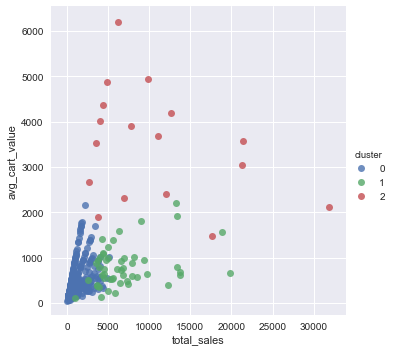

In [17]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=base_df, fit_reg=False)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="threshold"></span>
# 3. Threshold DF

The second set of features we'll consider is **"Threshold DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the purchase counts for the 20 most popular items.

We'll repeat the same steps as above.

<br>
**First, initialize a new model pipeline for K-Means.**
* Set it to create 3 clusters.
* Also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [ ]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

**Next, fit the K-Means model pipeline to <code style="color:steelblue">threshold_df</code>.**

In [18]:
# Fit K-Means pipeline
k_means.fit(threshold_df)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

**Save the clusters to <code style="color:steelblue">threshold_df</code>.**

In [19]:
# Save clusters to threshold_df
threshold_df['cluster'] = k_means.predict(threshold_df)

# Display first 5 rows of threshold_df
threshold_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,22961,22630,...,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,0,0,...,0,0,0,5,0,0,4,0,0,0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,0,0,...,0,0,0,0,0,0,0,0,4,2
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,0,0,...,0,0,0,0,1,1,1,1,1,2
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,0,0,...,1,0,0,0,0,0,0,0,1,2
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,0,1,...,0,0,0,1,0,0,2,0,5,2


If you scroll to the right, you'll see the assigned clusters.

<br>
**To visualize these clusters, plot a scatterplot and color the points by cluster.**
* Use the same 2 features as in the scatterplot above so that you can visually contrast the plots.
* Use the <code style="color:steelblue">hue=</code> argument to color by cluster.

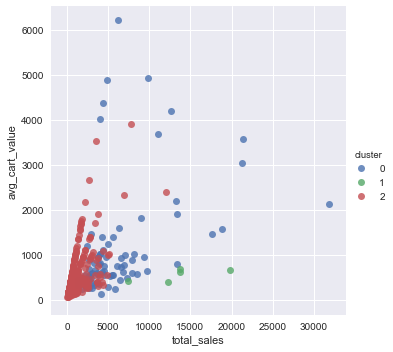

In [21]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=threshold_df, fit_reg=False)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="pca"></span>
# 4. PCA DF

The last set of features we'll consider is **"PCA DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the first 125 principal component features from the item data.

We'll repeat the same steps as above.

<br>

**First, initialize a new model pipeline for K-Means.**
* Set it to create 3 clusters.
* Also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [ ]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

**Next, fit the K-Means model pipeline to <code style="color:steelblue">pca_df</code>.**

In [22]:
# Fit K-Means pipeline
k_means.fit(pca_df)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

**Save the clusters to <code style="color:steelblue">pca_df</code>.**

In [23]:
# Save clusters to pca_df
pca_df['cluster'] = k_means.predict(pca_df)

# Display first 5 rows of pca_df
pca_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,PC1,PC2,...,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,5.876141,4.828892,...,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058,0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,-4.219839,1.226195,...,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993,0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,-1.260838,2.387828,...,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639,0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,-4.929319,-0.714874,...,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232,0
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,-2.053129,2.110788,...,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235,0


Again, if you scroll ALLLLLLL the way to the right, you'll see the assigned clusters.

<br>
**To visualize these clusters, plot a scatterplot and color the points by cluster.**
* Use the same 2 features as in the scatterplot above so that you can visually contrast the plots.
* Use the <code style="color:steelblue">hue=</code> argument to color by cluster.

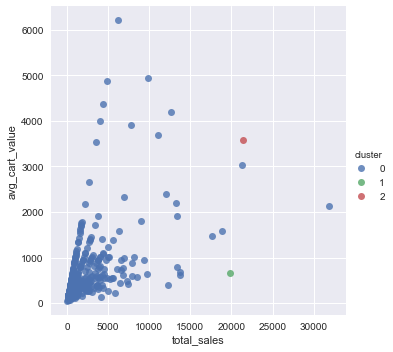

In [24]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_df, fit_reg=False)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="comparison"></span>
# 5. Model comparison

Each of those 3 dataframes have the same indices:

In [25]:
# Check all indices are identical
print(all(base_df.index == threshold_df.index))
print(all(base_df.index == pca_df.index))

True
True


**Let's import the adjusted Rand index from Scikit-Learn.**

In [27]:
# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

**We can see the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">threshold_df.cluster</code> like so:**

In [28]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.60213549517823428

Furthermore, the adjusted Rand index is **symmetric**, which means you can pass in the clusters in any order.

In [29]:
# Similary between threshold_df.cluster and base_df.cluster
adjusted_rand_score(threshold_df.cluster, base_df.cluster)

0.60213549517823428

**Finally, display the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">pca_df.cluster</code>.**
* Is it higher or lower than the one between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">threshold_df.cluster</code>?
* Which clusters are more like the ones created from the the base dataframe?

In [30]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.042311307744307906

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<br>
## Next Steps

Congratulations for making it through Project 4's Cluster Analysis!

As a reminder, here are a few things you did in this module:
* You brought together all of the customer-level features you've created in this project.
* You learned the inuitition behind the K-Means algorithm.
* You applied the K-Means algorithm to 3 different feature sets.
* And you compared the consensus (or lack thereof) of the clusters created.

This marks the end of Project 4!

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>